In [1]:
#%pip install cartopy

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


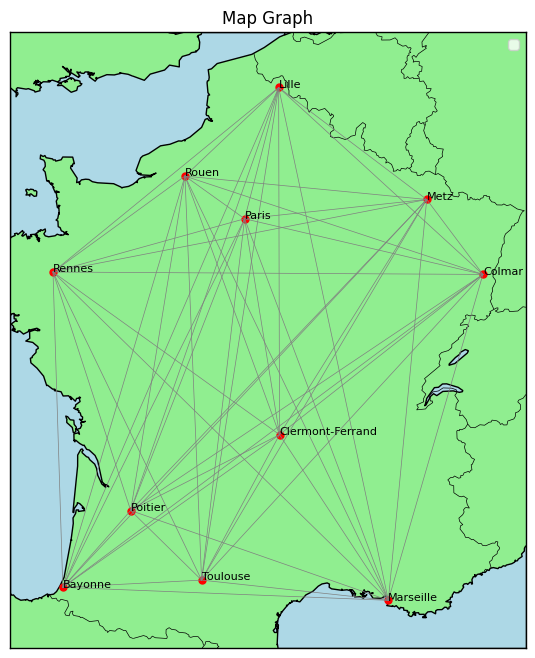

In [2]:
import numpy as np
import random
from Graphs.RandomGraph import RandomGraph
from Graphs.MapGraph import MapGraph
random.seed(0)
np,random.seed(0)

cities = ["Marseille", "Rouen", "Lille", "Rennes","Poitier", "Colmar", "Bayonne", "Toulouse","Paris","Metz","Clermont-Ferrand"]
#create real graph
graph = MapGraph(cities=cities,start_city="Rouen")
graph.plot_graph()

Costed 11 edges of 55


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


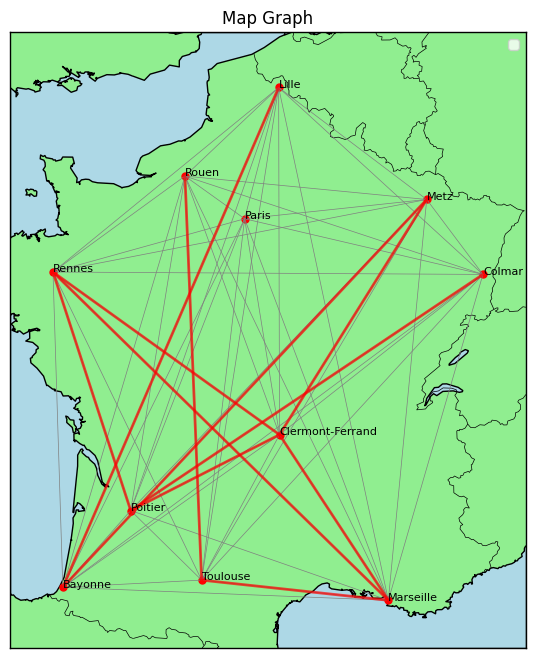

In [3]:
#Filtration
edge_costly_percentage = 20
graph.apply_edge_costly(percentage=edge_costly_percentage)

if(edge_costly_percentage > 0):
    graph.plot_graph()

Algorithm TABU : 

Execution time : 0.33031702041625977 s (330.31702041625977 ms)
Best paths: [['Rouen', 'Colmar', 'Metz', 'Lille', 'Marseille', 'Poitier', 'Bayonne', 'Clermont-Ferrand', 'Toulouse', 'Paris', 'Rennes', 'Rouen']]
Total distance: 4235.539182650685
Distance per vehicles  : [4235.539182650685]
Average distance for each vehicles : 4235.539182650685
Standard deviation distance for each vehicles : 0.0
Number of iterations needed to find the solution : 32
Total number of iterations : 49


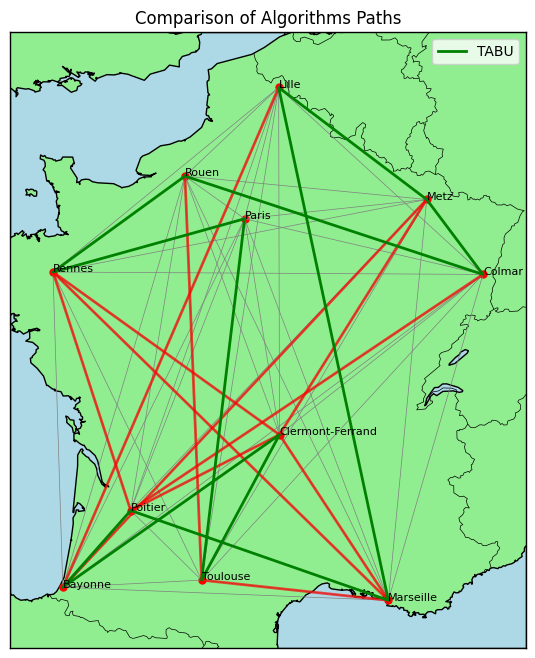

Algorithm ACO : 

Execution time : 3.304453134536743 s (3304.453134536743 ms)
Best paths: [['Rouen', 'Paris', 'Lille', 'Metz', 'Colmar', 'Clermont-Ferrand', 'Toulouse', 'Poitier', 'Marseille', 'Bayonne', 'Rennes', 'Rouen']]
Total distance: 3372.5239418255173
Distance per vehicles  : [3372.5239418255173]
Average distance for each vehicles : 3372.5239418255173
Standard deviation distance for each vehicles : 0.0
Number of iterations needed to find the solution : 2
Total number of iterations : 50


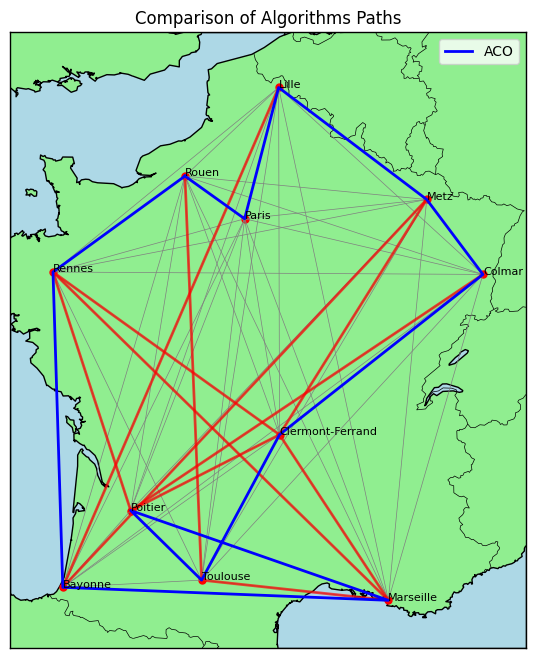

Algorithm GENETIC : 

Execution time : 0.1309340000152588 s (130.9340000152588 ms)
Best paths: [['Rouen', 'Lille', 'Metz', 'Colmar', 'Rennes', 'Paris', 'Clermont-Ferrand', 'Toulouse', 'Bayonne', 'Poitier', 'Marseille', 'Rouen']]
Total distance: 3841.6560857084496
Distance per vehicles  : [3841.6560857084496]
Average distance for each vehicles : 3841.6560857084496
Standard deviation distance for each vehicles : 0.0
Number of iterations needed to find the solution : 60
Total number of iterations : 110


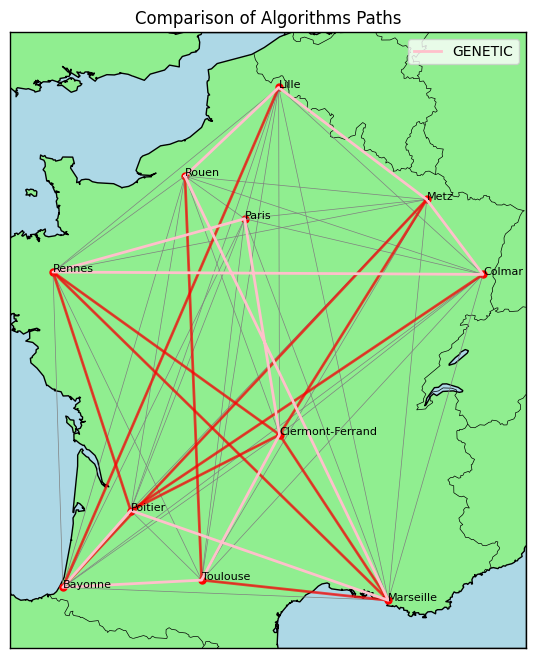

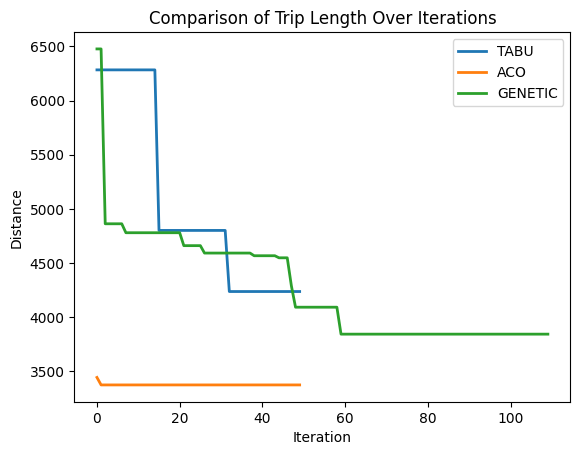

In [4]:
from Algorithms.ACO.AcoAlgo import AcoAlgo
from Algorithms.Tabu.TabuAlgo import TabuAlgo
from Algorithms.Genetic.GeneticAlgo import GeneticAlgo
from utils.plot import Plot

def run_algorithm(graph,algorithm,plot_path = True):
    algorithm.run()
    print(f"Algorithm {algorithm.name} : \n")
    vehicles_paths = {i + 1: path for i, path in enumerate(algorithm.paths)}
    current_path_results = {}
    algorithms_path_results = {}
    current_path_results[algorithm.name] = vehicles_paths
    algorithms_path_results[algorithm.name] = current_path_results[algorithm.name]
    
    # Print the best path found and the total distance
    print(f"Execution time : {algorithm.execution_time} s ({algorithm.execution_time * 1000} ms)")
    print(f"Best paths: {algorithm.paths}")
    print(f"Total distance: { algorithm.distance}")
    print(f"Distance per vehicles  : {algorithm.distance_per_vehicles}")
    print(f"Average distance for each vehicles : {algorithm.distance_average_per_vehicles}")
    print(f"Standard deviation distance for each vehicles : {algorithm.distance_standard_deviation_per_vehicles}")
    print(f"Number of iterations needed to find the solution : {algorithm.iterations_needed}")
    print(f"Total number of iterations : {algorithm.total_interations_realized}")
    if plot_path:
        graph.plot_graph(current_path_results)

def run_algorithms(graph, algorithms, plot_paths=True):
    algorithms_distance_results = {}

    for algorithm in algorithms:
        algorithm.run()

        algorithms_distance_results[algorithm.name] = algorithm.distance_history

        print(f"Algorithm {algorithm.name} : \n")
        vehicles_paths = {i + 1: path for i, path in enumerate(algorithm.paths)}
        print(f"Execution time : {algorithm.execution_time} s ({algorithm.execution_time * 1000} ms)")
        print(f"Best paths: {algorithm.paths}")
        print(f"Total distance: {algorithm.distance}")
        print(f"Distance per vehicles  : {algorithm.distance_per_vehicles}")
        print(f"Average distance for each vehicles : {algorithm.distance_average_per_vehicles}")
        print(f"Standard deviation distance for each vehicles : {algorithm.distance_standard_deviation_per_vehicles}")
        print(f"Number of iterations needed to find the solution : {algorithm.iterations_needed}")
        print(f"Total number of iterations : {algorithm.total_interations_realized}")

        if plot_paths:
            graph.plot_graph({algorithm.name: vehicles_paths})

    Plot.plot_distance_over_iterations_comparison(algorithms_distance_results)

max_iterations = 1000
convergence_threshold = 50
num_vehicles = 1

ACO = AcoAlgo(graph,"ACO",num_vehicles,100,0.5,5,4.45,max_iterations,convergence_threshold)
TABU = TabuAlgo(graph,"TABU",num_vehicles,10,max_iterations,convergence_threshold)
GENETIC = GeneticAlgo(graph, "GENETIC",num_vehicles,20, max_iterations=max_iterations, convergence_threshold=convergence_threshold)
algorithms = [TABU,ACO,GENETIC]
run_algorithms(graph,algorithms)